# The dataset

<img src="https://www.cityofames.org/Home/ShowImage?id=6334&t=635943415687730000">

(Image source: [City of Ames homepage](https://www.cityofames.org/about-ames))

We will use the "Ames Housing" dataset that describes properties in Ames (Iowa) together with their estimated value.
The list and explanation of all features can be found [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt), but we will concentrate only on a few columns, namely

- Lot Area (Continuous): Lot size in square feet
- Gr Liv Area (Continuous): Above grade (ground) living area square feet
- Total Bsmt SF (Continuous): Total square feet of basement area
- Garage Cars (Discrete): Size of garage in car capacity
- Overall Qual (Ordinal): Rates the overall material and finish of the house
- Overall Cond (Ordinal): Rates the overall condition of the house
- SalePrice (Continuous): Sale price

In [ ]:
! wget "https://drive.google.com/uc?export=download&id=1PZT1MrswHXYuNUiYxRcPcBZe81uVdPM9" -O AmesHousing.csv

--2022-03-07 11:45:45--  https://drive.google.com/uc?export=download&id=1PZT1MrswHXYuNUiYxRcPcBZe81uVdPM9
Resolving drive.google.com (drive.google.com)... 172.217.13.78, 2607:f8b0:4004:808::200e
Connecting to drive.google.com (drive.google.com)|172.217.13.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/os7qpkh5dfsv55sga66ljplnp88l3ibf/1646653500000/07111638629254909344/*/1PZT1MrswHXYuNUiYxRcPcBZe81uVdPM9?e=download [following]
--2022-03-07 11:45:46--  https://doc-04-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/os7qpkh5dfsv55sga66ljplnp88l3ibf/1646653500000/07111638629254909344/*/1PZT1MrswHXYuNUiYxRcPcBZe81uVdPM9?e=download
Resolving doc-04-bk-docs.googleusercontent.com (doc-04-bk-docs.googleusercontent.com)... 142.250.65.65, 2607:f8b0:4004:832::2001
Connecting to doc-04-bk-docs.googleusercontent.com (doc-04-bk-docs.googleuserc

In [ ]:
import numpy as np
random_seed = 111222
np.random.seed(random_seed) #This is good practice for reproducibiity

import pandas as pd

df = pd.read_csv("AmesHousing.csv")

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
df = df[["Lot Area", "Gr Liv Area", "Total Bsmt SF", "Overall Qual", "Overall Cond", "Garage Cars", "SalePrice"]]
df.head()

,Lot Area,Gr Liv Area,Total Bsmt SF,Overall Qual,Overall Cond,Garage Cars,SalePrice
0,31770,1656,1080.0,6,5,2.0,215000
1,11622,896,882.0,5,6,1.0,105000
2,14267,1329,1329.0,6,6,1.0,172000
3,11160,2110,2110.0,7,5,2.0,244000
4,13830,1629,928.0,5,5,2.0,189900


In [ ]:
def normalize_columnname(h):
    """Normalize a column name by downcasing and replacing spaces with '_'.
    """
    h = h.split()
    h = "_".join(h)
    return h.lower()

df.rename(columns=normalize_columnname, inplace=True)
df.rename(columns=str.lower, inplace=True)
df.head()

,lot_area,gr_liv_area,total_bsmt_sf,overall_qual,overall_cond,garage_cars,saleprice
0,31770,1656,1080.0,6,5,2.0,215000
1,11622,896,882.0,5,6,1.0,105000
2,14267,1329,1329.0,6,6,1.0,172000
3,11160,2110,2110.0,7,5,2.0,244000
4,13830,1629,928.0,5,5,2.0,189900


In [ ]:
df.describe()

,lot_area,gr_liv_area,total_bsmt_sf,overall_qual,overall_cond,garage_cars,saleprice
count,2930.000000,2930.000000,2929.000000,2930.000000,2930.000000,2929.000000,2930.000000
mean,10147.921843,1499.690444,1051.614544,6.094881,5.563140,1.766815,180796.060068
std,7880.017759,505.508887,440.615067,1.411026,1.111537,0.760566,79886.692357
min,1300.000000,334.000000,0.000000,1.000000,1.000000,0.000000,12789.000000
25%,7440.250000,1126.000000,793.000000,5.000000,5.000000,1.000000,129500.000000
50%,9436.500000,1442.000000,990.000000,6.000000,5.000000,2.000000,160000.000000
75%,11555.250000,1742.750000,1302.000000,7.000000,6.000000,2.000000,213500.000000
max,215245.000000,5642.000000,6110.000000,10.000000,9.000000,5.000000,755000.000000


In [ ]:
df.dropna(inplace=True)

df.describe()

,lot_area,gr_liv_area,total_bsmt_sf,overall_qual,overall_cond,garage_cars,saleprice
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.00000,2928.000000,2928.000000
mean,10149.730533,1499.784495,1051.680328,6.095970,5.56250,1.767077,180841.033811
std,7882.299902,505.522007,440.675942,1.410831,1.11157,0.760564,79889.904415
min,1300.000000,334.000000,0.000000,1.000000,1.00000,0.000000,12789.000000
25%,7440.750000,1126.000000,793.000000,5.000000,5.00000,1.000000,129500.000000
50%,9444.500000,1442.000000,990.000000,6.000000,5.00000,2.000000,160000.000000
75%,11556.000000,1742.250000,1302.000000,7.000000,6.00000,2.000000,213500.000000
max,215245.000000,5642.000000,6110.000000,10.000000,9.00000,5.000000,755000.000000


# Dividing the data

In [ ]:
from sklearn.model_selection import train_test_split
# This is THE gold standard, use it at all times!!!!!!



df_train, df_validtest = train_test_split(df, test_size=0.2, random_state=random_seed)
# The % param should be the task

df_valid, df_test = train_test_split(df_validtest, test_size=0.5, random_state=random_seed)

# df_train 0.8
# df_validtest 0.2



print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

assert df_train.shape==(2342, 7)
assert df_valid.shape==(293, 7)
assert df_test.shape==(293, 7)


(2342, 7)
(293, 7)
(293, 7)


# Fitting a linear regression model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[("scaler", StandardScaler()), ("lr", LinearRegression())])

pipe

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
train_input = df_train.drop("saleprice", axis=1)

pipe.fit(train_input, df_train.saleprice)

coefs = pipe.named_steps["lr"].coef_
assert round(coefs[0],4) == round(5745.50710428,4)
assert round(coefs[-1],4) == round(12857.60167802,4)
coefs

array([ 5745.50710428, 23254.21346451, 13694.16736287, 35903.63703616,
        2094.51751137, 12857.60167802])

In [ ]:
names_and_coefs = [(df.columns[i], coefs[i]) for i, _ in enumerate(coefs)]
sorted(names_and_coefs, key=lambda x: x[1], reverse=True)

[('overall_qual', 35903.63703616176),
 ('gr_liv_area', 23254.21346451011),
 ('total_bsmt_sf', 13694.167362874134),
 ('garage_cars', 12857.601678018198),
 ('lot_area', 5745.507104276569),
 ('overall_cond', 2094.517511367364)]

In [ ]:
pipe.named_steps["lr"].intercept_

181944.80401366355

In [ ]:
train_lr_prediction = pipe.predict(train_input)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Train mean squared error:", mean_squared_error(df_train.saleprice, train_lr_prediction))
print("Train mean abs. error:", mean_absolute_error(df_train.saleprice, train_lr_prediction))

Train mean squared error: 1463930137.8194811
Train mean abs. error: 24962.204115048527


In [ ]:
valid_input = df_valid.drop("saleprice", axis=1)

valid_lr_prediction = pipe.predict(valid_input)             

print("Valid mean abs. error:", mean_absolute_error(df_valid.saleprice, valid_lr_prediction))

Valid mean abs. error: 23264.661376560987


# Regularized versions



## Ridge

In [ ]:
from sklearn.linear_model import Ridge
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("ridge", Ridge(alpha=1000.))])
pipe.fit(train_input, df_train.saleprice)
coefs = pipe.named_steps["ridge"].coef_
names_and_coefs = [(df.columns[i], coefs[i]) for i, _ in enumerate(coefs)]
sorted(names_and_coefs, key=lambda x: x[1], reverse=True)

[('overall_qual', 25772.97082363602),
 ('gr_liv_area', 19764.50615135041),
 ('garage_cars', 14265.250254074763),
 ('total_bsmt_sf', 14126.034022848253),
 ('lot_area', 5169.265709223372),
 ('overall_cond', 798.3768940545815)]

In [ ]:
train_ridge_prediction = pipe.predict(train_input)
print("Train mean squared error:", mean_squared_error(df_train.saleprice, train_ridge_prediction))
print("Train mean abs. error:", mean_absolute_error(df_train.saleprice, train_ridge_prediction))
valid_ridge_prediction = pipe.predict(valid_input)             
print("Valid mean abs. error:", mean_absolute_error(df_valid.saleprice, valid_ridge_prediction))

Train mean squared error: 1595399923.3196523
Train mean abs. error: 24827.852793278067
Valid mean abs. error: 23062.536489821778


## Lasso

In [ ]:
from sklearn.linear_model import Lasso
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("lasso", Lasso(alpha=3000))])
pipe.fit(train_input, df_train.saleprice)
coefs = pipe.named_steps["lasso"].coef_
names_and_coefs = [(df.columns[i], coefs[i]) for i, _ in enumerate(coefs)]
sorted(names_and_coefs, key=lambda x: x[1], reverse=True)

[('overall_qual', 35004.25685848138),
 ('gr_liv_area', 22527.03881289466),
 ('total_bsmt_sf', 12363.419542632972),
 ('garage_cars', 11341.026357419278),
 ('lot_area', 3582.024126333946),
 ('overall_cond', 0.0)]

In [ ]:
train_lasso_prediction = pipe.predict(train_input)
print("Train mean squared error:", mean_squared_error(df_train.saleprice, train_lasso_prediction))
print("Train mean abs. error:", mean_absolute_error(df_train.saleprice, train_lasso_prediction))
valid_lasso_prediction = pipe.predict(valid_input)             
print("Valid mean abs. error:", mean_absolute_error(df_valid.saleprice, valid_lasso_prediction))

Train mean squared error: 1486618001.701819
Train mean abs. error: 24918.258066677205
Valid mean abs. error: 23661.16664143386


# Look at residuals

(For more sophisticated inspection, use [Yellowbricks](http://www.scikit-yb.org/en/latest/index.html))

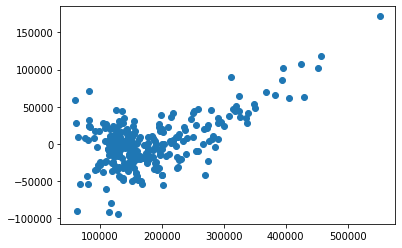

In [ ]:
import matplotlib.pyplot as plt

lasso_resid = df_valid.saleprice.values-valid_lasso_prediction

plt.scatter(df_valid.saleprice.values, lasso_resid)
plt.show()
